In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [28]:
stations = gpd.read_file('../data/osm_region_gasstations.geojson')
tn_bounds = gpd.read_file('../data/tennessee_administrative/tennessee_administrative.shp')


In [6]:
print(stations.crs)

epsg:4326


In [7]:
stations.head()

,id,@id,addr:city,addr:country,addr:housenumber,addr:postcode,addr:state,addr:street,amenity,brand,...,payment:notes,restaurant,fuel:regular,description,payment:account_cards,payment:visa_electron,fuel:mid_grade,fuel:premium_superplus,payment:amex,geometry
0,relation/5698572,relation/5698572,Clarksville,US,523,37042,TN,Dover Road,fuel,Marathon,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-87.41501 36.55249, -87.41502 36.552..."
1,relation/5712143,relation/5712143,None,None,None,None,None,None,fuel,BP,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-87.42603 36.57135, -87.42610 36.571..."
2,relation/6058356,relation/6058356,None,None,None,None,None,None,fuel,Exxon,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-81.69313 35.72059, -81.69350 35.720..."
3,relation/6325696,relation/6325696,La Follette,None,2135,37766,TN,Jacksboro Pike,fuel,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-84.15842 36.34882, -84.15837 ..."
4,relation/8319771,relation/8319771,None,None,None,None,None,None,fuel,Exxon,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-86.39696 35.81660, -86.39700 ..."


<AxesSubplot:>

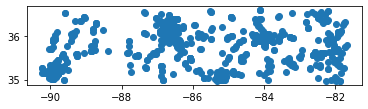

In [30]:
stations.plot()

In [12]:
print(tn_bounds.crs)


epsg:4326


In [13]:
tn_bounds.head()

,NAME,ADMIN_LEVE,geometry
0,None,8,"LINESTRING (-90.33999 35.03735, -90.33996 35.0..."
1,None,8,"LINESTRING (-90.31343 35.09869, -90.31489 35.0..."
2,Crittenden County,None,"LINESTRING (-90.14326 35.43626, -90.14730 35.4..."
3,Shelby County,None,"LINESTRING (-90.05415 35.38932, -90.03136 35.3..."
4,None,4,"LINESTRING (-90.30930 34.99569, -90.31030 35.0..."


In [14]:
stations_geo = gpd.GeoDataFrame(stations, 
                           crs = stations.crs, 
                           geometry = stations['geometry'])

In [15]:
tn_geo = gpd.GeoDataFrame(tn_bounds, 
                           crs = tn_bounds.crs, 
                           geometry = tn_bounds['geometry'])

In [32]:
tn_stations = gpd.sjoin(stations_geo, tn_geo, op = 'within')

/opt/homebrew/Caskroom/miniforge/base/envs/geospatial/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [33]:
tn_stations.plot()

/opt/homebrew/Caskroom/miniforge/base/envs/geospatial/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 432x288 with 1 Axes>

<AxesSubplot:>

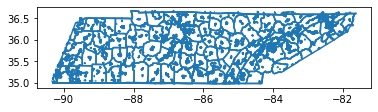

In [18]:
tn_bounds.plot()

In [19]:
area_center = [36.174465, -86.767960]

In [22]:
map_tn = folium.Map(location =  area_center, zoom_start = 8)
map_tn

In [25]:
marker_cluster = MarkerCluster().add_to(map_tn)

for row_index, row_values in tn_stations.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(marker_cluster)

In [24]:
map_tn